# <span style='color:#FE774C'>OBIS</span> Example Notebook

In [ ]:
import odp

import warnings
warnings.filterwarnings("ignore")

In [ ]:
db=odp.Database()
db_plt= odp.PlotTools()

In [ ]:
db.datasets

,schema,table
name,,
World Ocean Database Measurements,raw_wod,observations_temp
World Ocean Database Casts,raw_wod,casts_temp
OBIS Biodiversity,raw_obis,occurrences
World Marine Heritage Sites,raw_marineregions,worldmarineheritagesites
World Seas IHO,raw_marineregions,world_seas_iho_v3
EEZ Land Union,raw_marineregions,eez_land_union_v3_202003
Intersect EEZ IHO,raw_marineregions,intersect_eez_iho_v4_2020
World EEZ,raw_marineregions,world_eez_v11_20191118


## Pulling data - <span style='color:#FE774C'> **Ocean Biodiversity Information System** </span>


#### Insert the name of the table you are interested in into the query function, and let's limit to 10 just to see what it looks like

In [ ]:
df=db.query('OBIS Biodiversity',
            date_from='2000-06-01',
            date_to='2000-08-31',
            limit=10)
df.head(3)

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,eccb2e02-9fdd-4fec-9c3b-54a9188e0e61,4.77667,52.9975,POINT (4.77667 52.99750),2000-06-01,2000-06-01,None,NaN,2000,6,...,None,urn:lsid:marinespecies.org:taxname:223866,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],None,NIOZ,None,https://marineinfo.org/id/dataset/5776,None
1,d62c336d-9969-415c-9153-e1ad9953a46d,4.77667,52.9975,POINT (4.77667 52.99750),2000-06-01,2000-06-01,None,NaN,2000,6,...,None,urn:lsid:marinespecies.org:taxname:107552,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],None,NIOZ,None,https://marineinfo.org/id/dataset/5776,None
2,bffc14e5-374f-455f-b6b0-385c32a7d1fd,4.77667,52.9975,POINT (4.77667 52.99750),2000-06-01,2000-06-01,None,NaN,2000,6,...,None,urn:lsid:marinespecies.org:taxname:107381,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],None,NIOZ,None,https://marineinfo.org/id/dataset/5776,None


In [ ]:
len(df.columns)

120

#### There are 120 columns so let's only pull the ones we are interested in
We can pass this into the data_columns input

In [ ]:
cols_of_interest = ['id','geometry','timestamp', 'depth','date_year','month', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'scientificName']

In [ ]:
df=db.query('OBIS Biodiversity', limit=10, data_columns=cols_of_interest)
df.head(3)

,id,geometry,timestamp,depth,year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,01e5a8b0-fad4-40a9-9849-df73668e1a4c,POINT (-75.45150 35.13600),2018-11-04,NaN,None,None,Animalia,Chordata,Aves,Charadriiformes,Laridae,Sterna,None,Sterna
1,01e65d51-029b-47ac-8c96-cc4896a5f131,POINT (-75.43140 35.32650),2018-02-09,NaN,None,None,Animalia,Chordata,Aves,Gaviiformes,Gaviidae,Gavia,Gavia stellata,Gavia stellata
2,01e6cdd8-c9e8-4e2c-bf83-3a4f71cddbd4,POINT (-79.35380 32.74170),2018-12-16,NaN,None,None,Animalia,Chordata,Aves,Charadriiformes,Phalaropodidae,Phalaropus,None,Phalaropus


### Add <span style='color:#9D59F4'> **filters** </span> to the data pull


#### In this case we are interseted in the OBIS dataset for a specific species, the Mackerel (Scomber scombrus)
#### Using the filter function, you can create filters for whichever column of the dataset you are interested in. 

Let's define the filters:


In [ ]:
filter1 = db.filter_data('scientificName', '=', 'Scomber scombrus')
filter2 = db.filter_data("depth", ">", "40")

And now let's pass into our query function

In [ ]:
df=db.query('OBIS Biodiversity',
            filters=[filter1, filter2], limit=10, data_columns=cols_of_interest)

In [ ]:
df.head(3)

,id,geometry,timestamp,depth,date_year,month,kingdom,phylum,class,order,family,genus,species,scientificName
0,ffa02fd7-64e7-47e0-8500-0b3b1196791c,POINT (17.24980 55.32070),2007-03-09,75.0,2007,3,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
1,ff39a47d-e4f4-43c7-9ebe-e30099ebf1d6,POINT (14.29370 55.06550),2006-11-04,46.0,2006,11,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus
2,ff1eb09a-1e96-43c8-946b-217fde9525cb,POINT (14.30000 55.08330),1999-11-10,48.0,1999,11,Animalia,Chordata,Actinopteri,Scombriformes,Scombridae,Scomber,Scomber scombrus,Scomber scombrus


### Look for OBIS data in a specific <span style='color:#9D59F4'> **polygon** </span>

Let's define our polygon

In [ ]:
poly= 'POLYGON ((3.0 51.0, 20 51, 20 80, 3 80, 3 51))' ## you can also always pass in a shapely polygon if you want


In [ ]:
df=db.query('OBIS Biodiversity',
            poly=poly, limit=10)

In [ ]:
df.head()

,id,decimalLongitude,decimalLatitude,geometry,timestamp,eventDate,eventTime,depth,date_year,month,...,higherClassification,scientificNameID,minimumDistanceAboveSurfaceInMeters,organismID,node_id,bibliographicCitation,institutionCode,recordedBy,datasetID,institutionID
0,ffa02fd7-64e7-47e0-8500-0b3b1196791c,17.2498,55.3207,POINT (17.24980 55.32070),2007-03-09,2007-03-09T05:37:00+00:00,05:37:00+00:00,75.0,2007,3,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],Baltic International Trawl Survey,ICES,Baltic International Trawl Survey,https://marineinfo.org/id/dataset/2760,None
1,ff39a47d-e4f4-43c7-9ebe-e30099ebf1d6,14.2937,55.0655,POINT (14.29370 55.06550),2006-11-04,2006-11-04T11:04:00+00:00,11:04:00+00:00,46.0,2006,11,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],Baltic International Trawl Survey,ICES,Baltic International Trawl Survey,https://marineinfo.org/id/dataset/2760,None
2,ff1eb09a-1e96-43c8-946b-217fde9525cb,14.3000,55.0833,POINT (14.30000 55.08330),1999-11-10,1999-11-10T10:31:00+00:00,10:31:00+00:00,48.0,1999,11,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],Baltic International Trawl Survey,ICES,Baltic International Trawl Survey,https://marineinfo.org/id/dataset/2760,None
3,feec4511-99d6-4daa-b1bf-1308894d7679,14.5052,55.1053,POINT (14.50520 55.10530),2008-11-03,2008-11-03T15:00:00+00:00,15:00:00+00:00,42.0,2008,11,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],Baltic International Trawl Survey,ICES,Baltic International Trawl Survey,https://marineinfo.org/id/dataset/2760,None
4,feb23efe-aa9f-4e1b-b34c-b0e2eeba6bba,16.3000,55.0167,POINT (16.30000 55.01670),1994-03-23,1994-03-23T11:13:00+00:00,11:13:00+00:00,60.0,1994,3,...,None,urn:lsid:marinespecies.org:taxname:127023,None,None,[4bf79a01-65a9-4db6-b37b-18434f26ddfc],Baltic International Trawl Survey,ICES,Baltic International Trawl Survey,https://marineinfo.org/id/dataset/2760,None


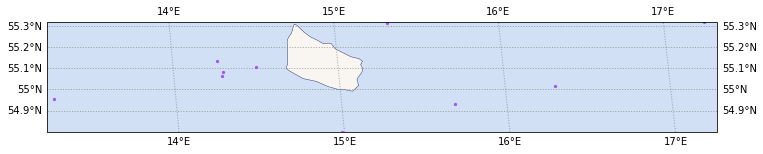

In [ ]:
db_plt.plot_points(df)

#### We can also create an interactive plot (will show only when cell is run)

In [ ]:
db.plot(df_meas, col='temperature' )